# <font color=red>Tutorial 8 - Hypotheses testing - Bootstrap</font>

## Introduction to Bootstrap

The bootstrap method is a resampling technique widely used in statistics to estimate the properties of a population based on a sample. It is particularly useful when it is difficult or impossible to obtain analytical solutions or when assumptions underlying traditional statistical methods are violated. This tutorial will provide you with an overview of the bootstrap method, its steps, and its applications.

#### What is the Bootstrap Method?
The bootstrap method is a resampling technique that involves repeatedly sampling from the original dataset to create multiple "bootstrap samples." These bootstrap samples are used to estimate the sampling distribution of a statistic or to make inferences about population parameters.

#### Steps of the Bootstrap Method:
1. Sample Generation. Start by obtaining a random sample (with replacement) from the original dataset. The size of the bootstrap sample should be the same as the original dataset so that it will preserve the distributional properties of the sample. <br>
2. Statistic Calculation. Calculate the desired statistic of interest (e.g., mean, median, standard deviation) on each bootstrap sample. This statistic represents an estimate of the population parameter.<br>
3. Replication. Repeat steps (1) and (2) multiple times, typically several thousand iterations, to create a large number of bootstrap samples and corresponding estimates of the statistic. <br>
4. Analysis of Estimates. Analyze the distribution of the statistic estimates obtained from the bootstrap samples to derive measures of uncertainty, such as confidence intervals or standard errors. <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Sri Lanka population height sample

We would like to estimate the mean height of Sri Lanka's population based on a sample provided in the attached CSV file. We assume that the sample distribution is a good representation of the entire population's distribution. We will use the bootstrap method to estimate the mean height with confidence of 95%.

### Read CSV file

In [2]:
sri_lanka_sample_df = pd.read_csv('Tutorial_8_data.csv')
sri_lanka_sample_df.head()

,Height(cm),Gender,Age
0,173,Male,26
1,164,Male,56
2,163,Male,26
3,171,Male,64
4,160,Male,78


In [4]:
sri_lanka_sample_df.shape

(4477, 3)

In [5]:
sri_lanka_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Height(cm)  4477 non-null   int64 
 1   Gender      4477 non-null   object
 2   Age         4477 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 105.1+ KB


In [6]:
sri_lanka_sample_df.describe(include='all')

,Height(cm),Gender,Age
count,4477.000000,4477,4477.000000
unique,NaN,2,NaN
top,NaN,Female,NaN
freq,NaN,2709,NaN
mean,155.500112,NaN,48.455216
std,9.314619,NaN,17.543870
min,127.000000,NaN,18.000000
25%,149.000000,NaN,34.000000
50%,155.000000,NaN,48.000000
75%,162.000000,NaN,64.000000


### Use Bootstrap to estimate Sri Lanka's population height mean

In [7]:
def bootstrap_mean(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample means:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples  '''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_means = np.empty(num_replications)
    for i in tqdm(range(num_replications)):
        # replace - allow or disallow sampling of the same row more than once.
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

In [8]:
# run the bootstrap procedure
means_bootstrapped = bootstrap_mean(sri_lanka_sample_df, 'Height(cm)', 5000)
means_bootstrapped

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2591.05it/s]


array([155.62407862, 155.67813268, 155.62809917, ..., 155.67143176,
       155.54813491, 155.49609113])

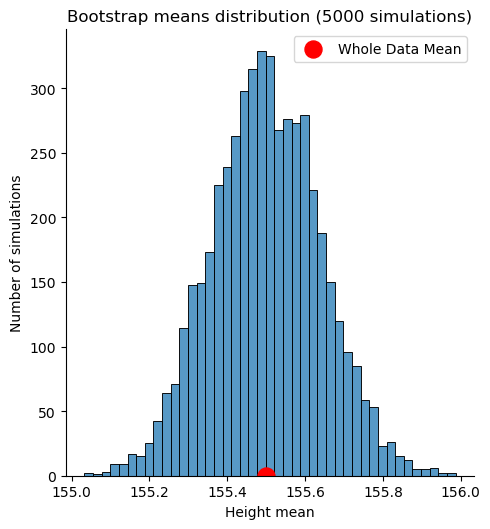

In [25]:
# visualize results
facetgrid_obj = sns.displot(means_bootstrapped)
facetgrid_obj.set(title='Bootstrap means distribution (5000 simulations)', xlabel='Height mean', ylabel='Number of simulations')

data_mean = sri_lanka_sample_df['Height(cm)'].mean()
facetgrid_obj.axes[0, 0].scatter(data_mean, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Whole Data Mean'])

In [27]:
data_mean

155.50011168192987

In [28]:
means_bootstrapped.min()

155.03283448737994

In [29]:
means_bootstrapped.max()

155.98682153227608

In [24]:
# 95% confidence interval for the height mean
left_end = np.percentile(means_bootstrapped, 2.5, method='higher')
right_end =  np.percentile(means_bootstrapped, 97.5, method='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

lower value:  155.23296850569577
upper value:  155.77283895465715


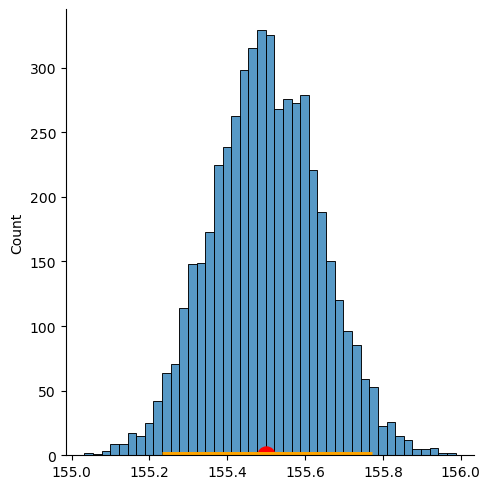

In [22]:
# visualize results
facetgrid_obj = sns.displot(means_bootstrapped)
facetgrid_obj.axes[0, 0].scatter(data_mean, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)  # show line of values between 2.5 and 97.5 percentiles

## <font color=blue> **Exercise** </font>

Since Sri Lanka's males are relatively short, a student assumed that there is no difference between the mean height of males and females in Sri Lanka. Examine the student's claim based on the given sample, assuming it represents the entire Sri Lanka's population.

### 1. Clearly state the two hypotheses

### 2. What is your statistic? 

### 3. Use the bootstrap method to examine the student's claim. You should use CI in order to try to reject the null hypothesis at the 0.05 significance level.

In [15]:
# write your code here